In [ ]:
# Beverage Sales Analysis
# This notebook contains the code used for data cleaning, exploration, and preparation behind the Tableau dashboard.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("synthetic_beverage_sales_data.csv")

In [5]:
df

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23
...,...,...,...,...,...,...,...,...,...,...,...
8999905,ORD2999999,CUS7080,B2C,Schwip Schwap,Soft Drinks,1.27,2,0.00,2.54,Sachsen,2023-07-03
8999906,ORD2999999,CUS7080,B2C,San Pellegrino,Water,0.91,15,0.00,13.65,Sachsen,2023-07-03
8999907,ORD3000000,CUS6551,B2B,Red Bull,Soft Drinks,2.94,64,0.10,169.34,Sachsen-Anhalt,2022-04-09
8999908,ORD3000000,CUS6551,B2B,Passion Fruit Juice,Juices,4.04,79,0.10,287.24,Sachsen-Anhalt,2022-04-09


In [7]:
def about_df(df):
    print('Basic information')
    print(df.info())
    print('\nUnique values')
    print(df.nunique())
    print('\nNumber of missing values')
    print(df.isnull().sum())
    print('\nNumber of duplicate rows')
    print(df.duplicated().sum())
    print("\nSummary Statistics:")
    print(df.describe())
    print(df.describe(include=object))

In [9]:
about_df(df)

Basic information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB
None

Unique values
Order_ID         3000000
Customer_ID        10000
Customer_Type          2
Product               47
Category               4
Unit_Price         12778
Quantity             100
Discount               4
Total_Price       203842
Region                16
Order_Date          1094
dtype: int64

Number of missing values
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price  

In [11]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [13]:
# Creating a reference date for RFM analysis
ref_date = df['Order_Date'].max()

In [15]:
rfm_b2b = df[df['Customer_Type'] == 'B2B'].groupby('Customer_ID').agg(
    Recency = ('Order_Date', lambda x: (ref_date - x.max()).days),
    Frequency = ('Order_ID', 'nunique'),
    Monetary = ('Total_Price', 'sum')
)

In [17]:
rfm_b2b

,Recency,Frequency,Monetary
Customer_ID,,,
CUS1000,1,289,271186.90
CUS10000,7,299,253436.72
CUS1002,4,277,247201.91
CUS1005,1,293,259063.08
CUS1006,5,312,277493.87
...,...,...,...
CUS9984,1,296,259132.12
CUS9989,2,340,342045.99
CUS999,0,301,197835.33


Text(0, 0.5, 'Frequency')

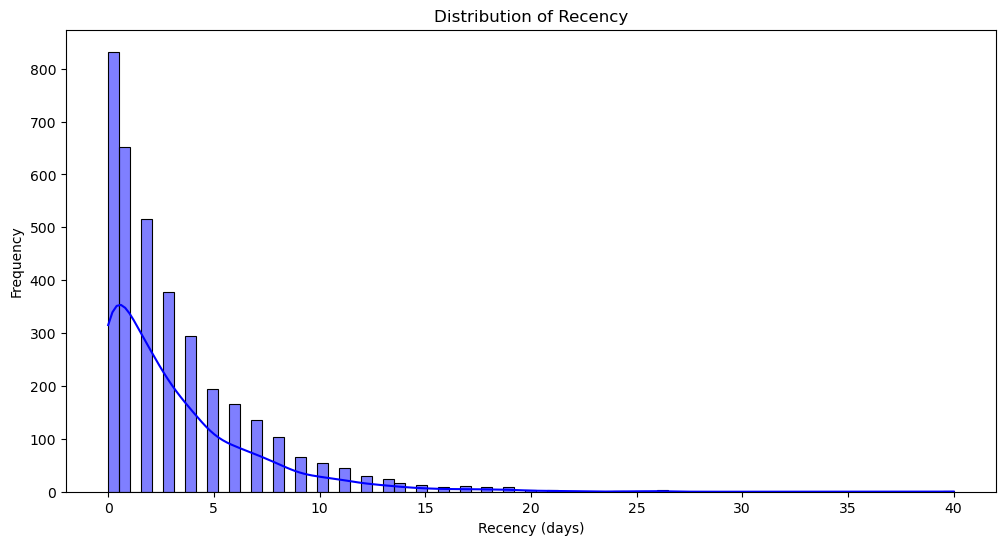

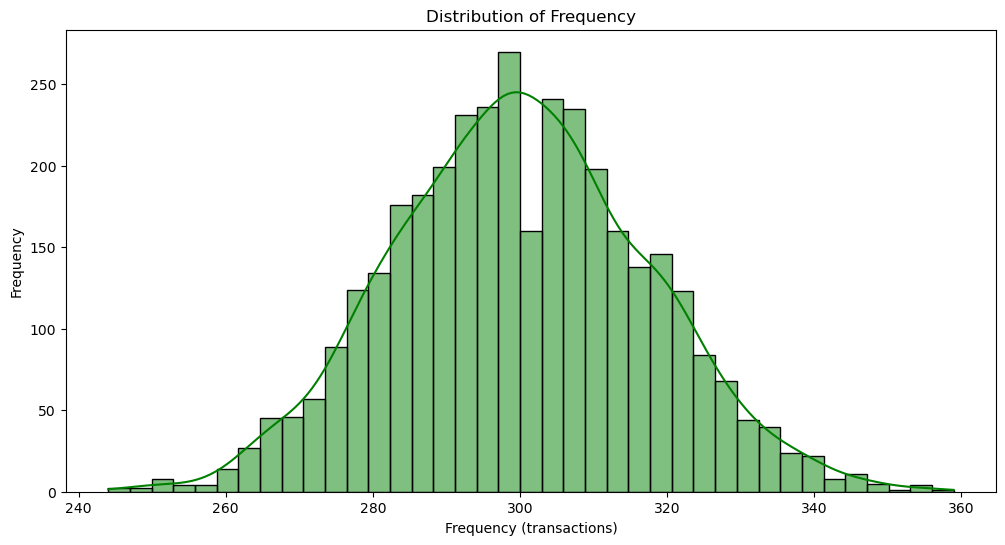

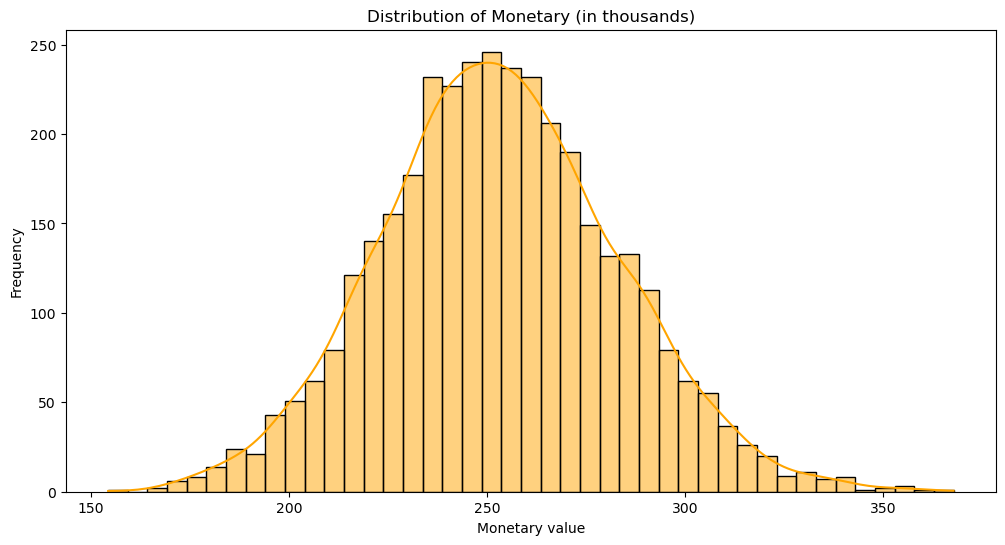

In [19]:
# Plot for recency
plt.figure(figsize=(12, 6))
sns.histplot(rfm_b2b['Recency'], kde=True, color='blue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')

# Plot for frequency
plt.figure(figsize=(12, 6))
sns.histplot(rfm_b2b['Frequency'], kde=True, color='green')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (transactions)')
plt.ylabel('Frequency')

#Plot for monetary
plt.figure(figsize=(12, 6))
sns.histplot(rfm_b2b['Monetary'] / 1000, kde=True, color='orange')
plt.title('Distribution of Monetary (in thousands)')
plt.xlabel('Monetary value')
plt.ylabel('Frequency')

In [23]:
rfm_b2c = df[df['Customer_Type'] == 'B2C'].groupby('Customer_ID').agg(
    Recency = ('Order_Date', lambda x: (ref_date - x.max()).days),
    Frequency = ('Order_ID', 'nunique'),
    Monetary = ('Total_Price', 'sum')
)

In [25]:
rfm_b2c

,Recency,Frequency,Monetary
Customer_ID,,,
CUS1,1,305,38904.13
CUS10,2,296,40288.83
CUS100,3,287,36039.74
CUS1001,0,312,35749.85
CUS1003,0,294,45890.74
...,...,...,...
CUS9994,7,306,44364.17
CUS9995,8,294,47795.78
CUS9996,5,297,49415.23


Text(0, 0.5, 'Frequency')

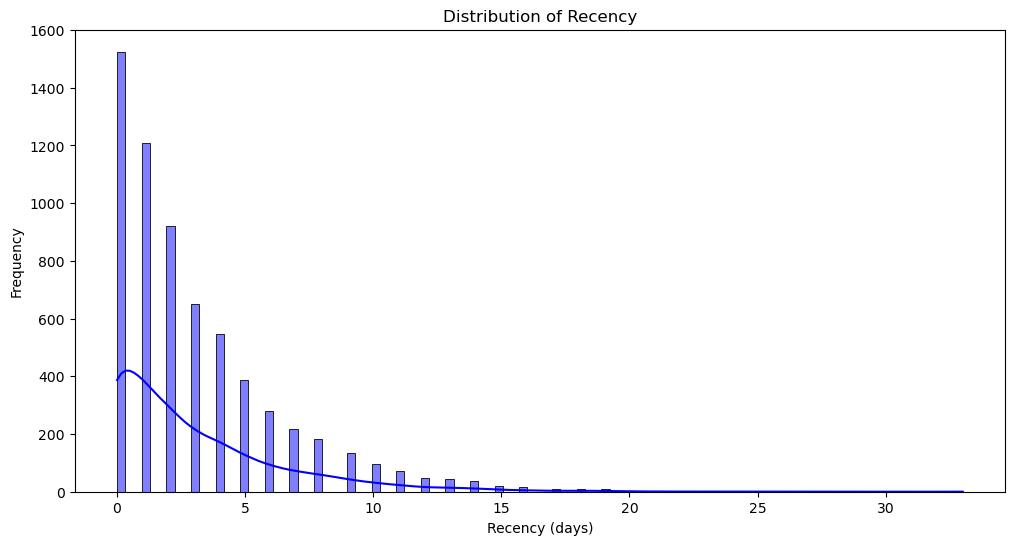

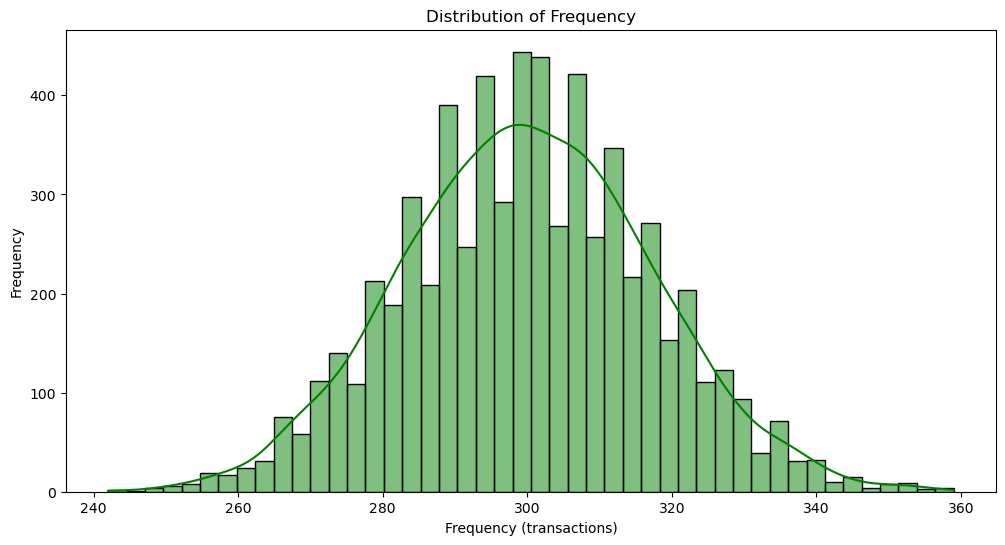

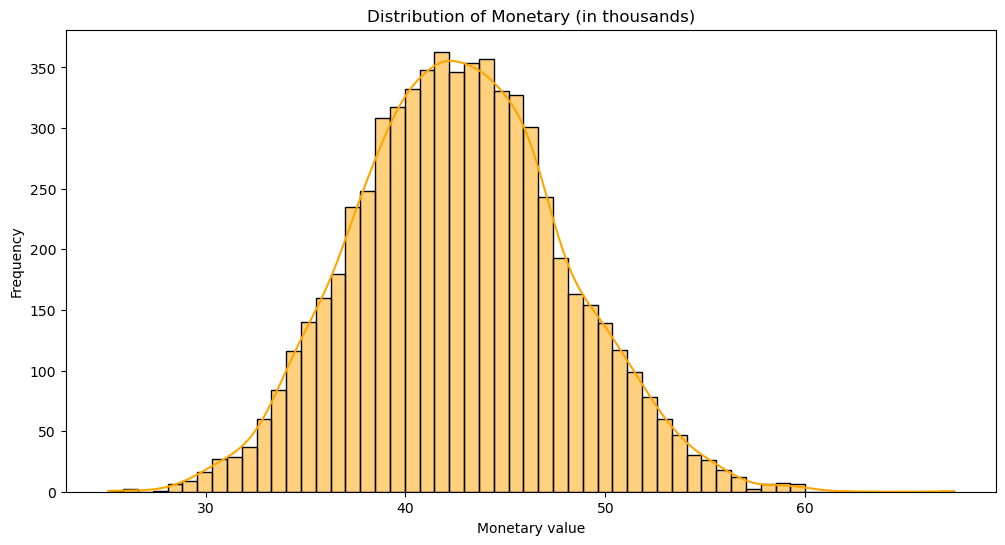

In [27]:
# Plot for recency
plt.figure(figsize=(12, 6))
sns.histplot(rfm_b2c['Recency'], kde=True, color='blue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')

# Plot for frequency
plt.figure(figsize=(12, 6))
sns.histplot(rfm_b2c['Frequency'], kde=True, color='green')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (transactions)')
plt.ylabel('Frequency')

#Plot for monetary
plt.figure(figsize=(12, 6))
sns.histplot(rfm_b2c['Monetary'] / 1000, kde=True, color='orange')
plt.title('Distribution of Monetary (in thousands)')
plt.xlabel('Monetary value')
plt.ylabel('Frequency')

In [29]:
# Normalizing data
scaler = StandardScaler()
rfm_b2b_normalized = scaler.fit_transform(rfm_b2b)
rfm_b2c_normalized = scaler.fit_transform(rfm_b2c)

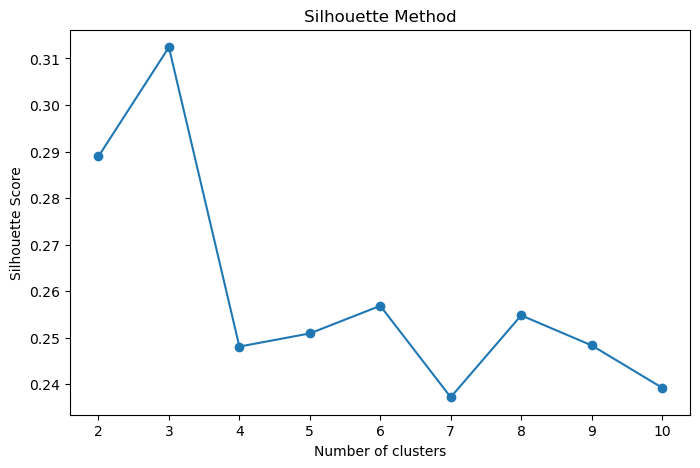

In [31]:
# Determining the number of clusters in B2B
silhouette_scores_b2b = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_b2b_normalized)
    silhouette_avg = silhouette_score(rfm_b2b_normalized, cluster_labels)
    silhouette_scores_b2b.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores_b2b, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

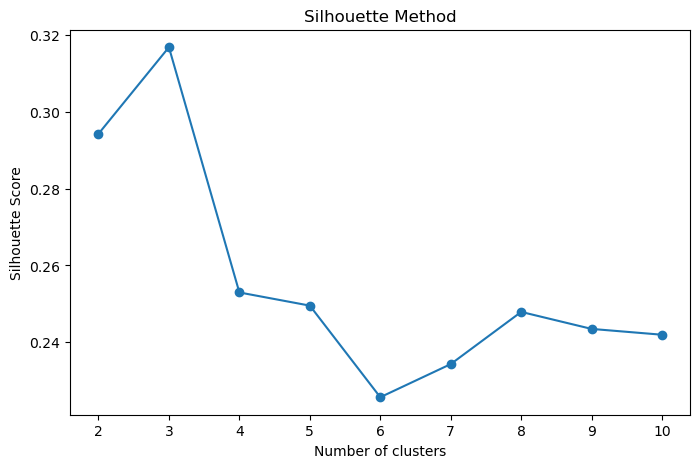

In [33]:
# Determining the number of clusters in B2C
silhouette_scores_b2c = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_b2c_normalized)
    silhouette_avg = silhouette_score(rfm_b2c_normalized, cluster_labels)
    silhouette_scores_b2c.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores_b2c, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [35]:
clusters_amt = 3
kmeans_b2b = KMeans(n_clusters=clusters_amt, random_state=42)
rfm_b2b['Cluster_B2B'] = kmeans_b2b.fit_predict(rfm_b2b_normalized)

kmeans_b2c = KMeans(n_clusters=clusters_amt, random_state=42)
rfm_b2c['Cluster_B2C'] = kmeans_b2c.fit_predict(rfm_b2c_normalized)

In [37]:
rfm_b2b

,Recency,Frequency,Monetary,Cluster_B2B
Customer_ID,,,,
CUS1000,1,289,271186.90,0
CUS10000,7,299,253436.72,2
CUS1002,4,277,247201.91,0
CUS1005,1,293,259063.08,0
CUS1006,5,312,277493.87,1
...,...,...,...,...
CUS9984,1,296,259132.12,0
CUS9989,2,340,342045.99,1
CUS999,0,301,197835.33,0


In [39]:
rfm_b2c

,Recency,Frequency,Monetary,Cluster_B2C
Customer_ID,,,,
CUS1,1,305,38904.13,2
CUS10,2,296,40288.83,2
CUS100,3,287,36039.74,2
CUS1001,0,312,35749.85,2
CUS1003,0,294,45890.74,0
...,...,...,...,...
CUS9994,7,306,44364.17,1
CUS9995,8,294,47795.78,1
CUS9996,5,297,49415.23,0


In [41]:
rfm_b2b['Customer_Type'] = 'B2B'
rfm_b2b

,Recency,Frequency,Monetary,Cluster_B2B,Customer_Type
Customer_ID,,,,,
CUS1000,1,289,271186.90,0,B2B
CUS10000,7,299,253436.72,2,B2B
CUS1002,4,277,247201.91,0,B2B
CUS1005,1,293,259063.08,0,B2B
CUS1006,5,312,277493.87,1,B2B
...,...,...,...,...,...
CUS9984,1,296,259132.12,0,B2B
CUS9989,2,340,342045.99,1,B2B
CUS999,0,301,197835.33,0,B2B


In [43]:
rfm_b2c['Customer_Type'] = 'B2C'
rfm_b2c

,Recency,Frequency,Monetary,Cluster_B2C,Customer_Type
Customer_ID,,,,,
CUS1,1,305,38904.13,2,B2C
CUS10,2,296,40288.83,2,B2C
CUS100,3,287,36039.74,2,B2C
CUS1001,0,312,35749.85,2,B2C
CUS1003,0,294,45890.74,0,B2C
...,...,...,...,...,...
CUS9994,7,306,44364.17,1,B2C
CUS9995,8,294,47795.78,1,B2C
CUS9996,5,297,49415.23,0,B2C


In [45]:
rfm_merged = pd.concat([rfm_b2b, rfm_b2c])
rfm_merged

,Recency,Frequency,Monetary,Cluster_B2B,Customer_Type,Cluster_B2C
Customer_ID,,,,,,
CUS1000,1,289,271186.90,0.0,B2B,NaN
CUS10000,7,299,253436.72,2.0,B2B,NaN
CUS1002,4,277,247201.91,0.0,B2B,NaN
CUS1005,1,293,259063.08,0.0,B2B,NaN
CUS1006,5,312,277493.87,1.0,B2B,NaN
...,...,...,...,...,...,...
CUS9994,7,306,44364.17,NaN,B2C,1.0
CUS9995,8,294,47795.78,NaN,B2C,1.0
CUS9996,5,297,49415.23,NaN,B2C,0.0


In [51]:
with pd.ExcelWriter('Beverage_RFM_merged.xlsx') as writer:
    rfm_merged.to_excel(writer)